In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
from matplotlib.gridspec import GridSpec
from glob import glob
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact, fixed

%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

In [44]:
filename = '2025-06-27'

df = pd.read_csv(f'../datas/CyTime/{filename}.csv')

# 清洗数据
def clean_time(time_str):
    return time_str.split()[0]  # 提取时间部分（忽略毫秒）

df['Time'] = df['Time'].apply(clean_time)
df = df.replace('', np.nan)  # 空字符串转NaN
clean_df = df.dropna(axis=1, how='all')
clean_df = clean_df.fillna(method='ffill')  # 用前向填充处理真空泵缺失值

In [45]:
clean_df

,Time,Cyl[1].WP_Time,Cyl[2].WP_Time,Cyl[3].WP_Time,Cyl[4].WP_Time,Cyl[5].WP_Time,Cyl[6].WP_Time,Cyl[7].WP_Time,Cyl[8].WP_Time,Cyl[9].WP_Time,...,Cyl[32].HP_Time,Cyl[33].HP_Time,Cyl[34].HP_Time,Cyl[35].HP_Time,Vac[1]_Time,Vac[2]_Time,Vac[3]_Time,Vac[4]_Time,Vac[5]_Time,Vac[7]_Time
0,00:50:08,0.62913,0.91219,0.61667,0.40484,0.18737,0.81252,0.15366,0.71342,0.42263,...,0.338,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.32608,0.28464
1,01:50:08,0.62913,0.91219,0.61667,0.40484,0.18737,0.81252,0.15366,0.71342,0.42263,...,0.338,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.32608,0.28464
2,02:50:08,0.62913,0.91219,0.61667,0.40484,0.18737,0.81252,0.15366,0.71342,0.42263,...,0.338,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.32608,0.28464
3,03:50:08,0.62913,0.91219,0.61667,0.40484,0.18737,0.81252,0.15366,0.71342,0.42263,...,0.338,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.32608,0.28464
4,04:50:08,0.62913,0.91219,0.61667,0.40484,0.18737,0.81252,0.15366,0.71342,0.42263,...,0.338,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.32608,0.28464
5,05:50:08,0.62913,0.91219,0.61667,0.40484,0.18737,0.81252,0.15366,0.71342,0.42263,...,0.338,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.32608,0.28464
6,06:50:08,0.62913,0.91219,0.61667,0.40484,0.18737,0.81252,0.15366,0.71342,0.42263,...,0.338,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.32608,0.28464
7,07:50:08,0.62913,0.91219,0.61667,0.40484,0.18737,0.81252,0.15366,0.71342,0.42263,...,0.338,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.32608,0.28464
8,08:50:08,0.62927,0.91314,0.61662,0.40478,0.18748,0.81219,0.18035,0.71413,0.42283,...,0.338,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.32611,0.62082
9,09:50:08,0.62886,0.91320,0.61646,0.40493,0.18791,0.81259,0.18050,0.72139,0.42306,...,0.338,0.6,0.316,1.15,0.0,0.0,0.0,0.0,0.30891,0.62037


In [46]:
# 关键真空泵分析（选择唯一有数据的Vac[5]和Vac[7]）
# vac_columns = ['Vac[5]_Time', 'Vac[7]_Time']
vac_columns = [col for col in clean_df.columns if 'Vac' in col]
vac_data = clean_df[['Time'] + vac_columns].copy()
vac_data[vac_columns] = vac_data[vac_columns].astype(float)

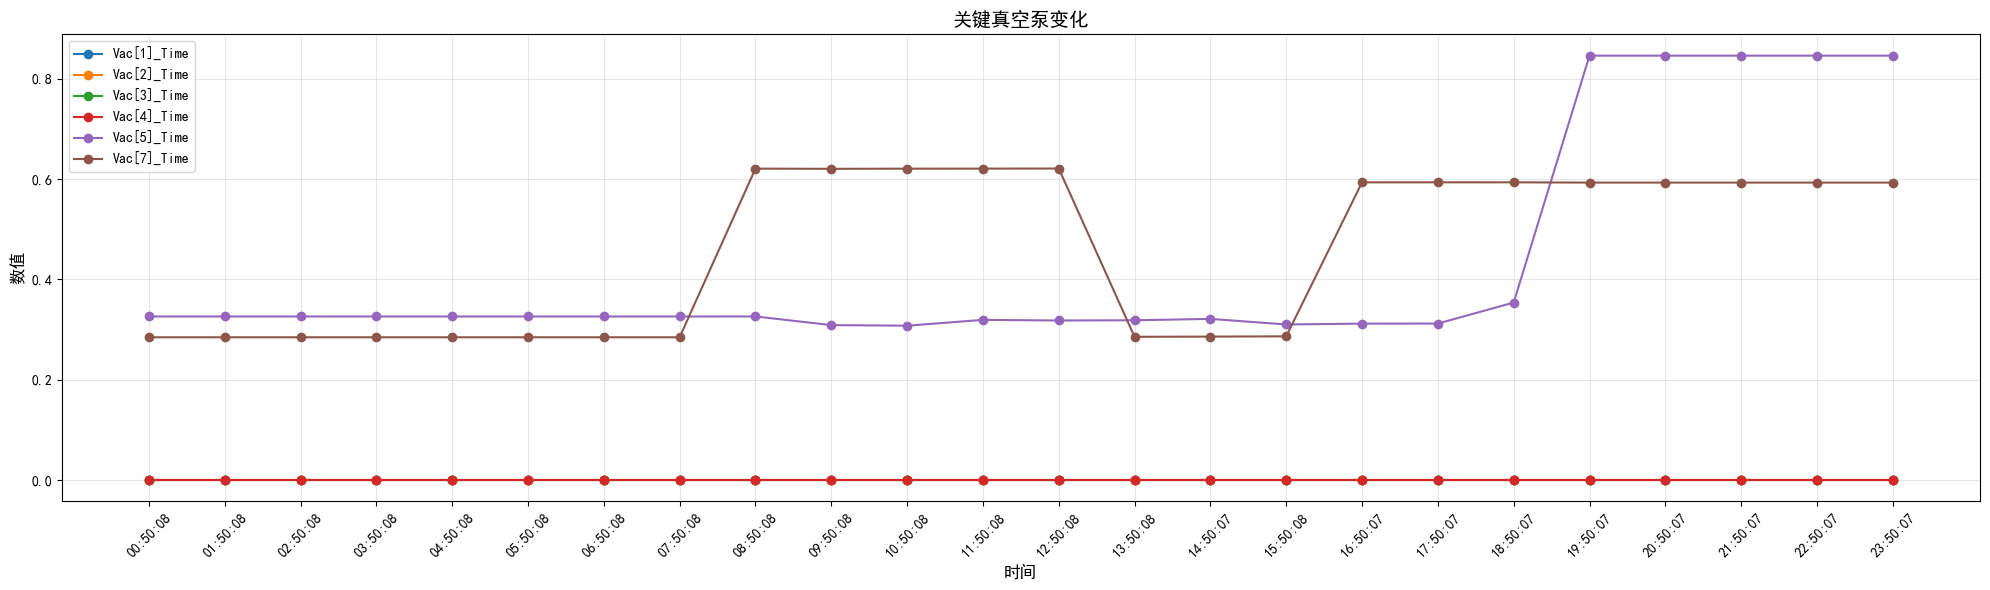

In [47]:
# 1. 真空泵趋势分析
plt.figure(figsize=(20, 6))
for col in vac_columns:
    plt.plot(vac_data['Time'], vac_data[col], label=col, marker='o')
plt.title('关键真空泵变化', fontsize=14)
plt.xlabel('时间', fontsize=12)
plt.ylabel('数值', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(f'../datas/imgs/cytime/关键真空泵变化{filename}.png', dpi=300)

In [ ]:
clean_df['Time'] = pd.to_datetime(clean_df['Time'], format='%H:%M:%S')

## 1. 预处理：将数据分为高压(HP)和低压(WP)两组
# 提取所有HP列
hp_cols = [col for col in clean_df.columns if 'HP' in col]
hp_df = clean_df[['Time'] + hp_cols].copy()

# 提取所有WP列
wp_cols = [col for col in clean_df.columns if 'WP' in col]
wp_df = clean_df[['Time'] + wp_cols].copy()

# 气缸数量统计 (以低压列为准)
num_cyl = len(wp_cols)
cols_per_row = 3  # 每行显示3个气缸
rows = int(np.ceil(num_cyl / cols_per_row))

# 创建专业级图表布局
plt.figure(figsize=(20, 5*rows))
gs = GridSpec(rows, cols_per_row)
plt.suptitle('气缸高压/低压数值分析', fontsize=20, y=0.95)

# 创建颜色映射 - 低压用冷色调，高压用暖色调
wp_color = plt.cm.get_cmap('Blues')(0.7)  # 深蓝色
hp_color = plt.cm.get_cmap('Reds')(0.7)   # 深红色

for i, wp_col in enumerate(wp_cols):
    # 提取气缸编号
    cyl_num = wp_col.split('[')[1].split(']')[0]
    
    # 计算子图位置
    ax_row = i // cols_per_row
    ax_col = i % cols_per_row
    ax = plt.subplot(gs[ax_row, ax_col])
    
    # 创建双Y轴
    ax_hp = ax.twinx()
    
    # 获取对应的HP列名称
    hp_col_name = f'Cyl[{cyl_num}].HP_Time'
    
    # 绘制低压数据 (左轴)
    ax.plot(wp_df['Time'], wp_df[wp_col], 'o-', color=wp_color, alpha=0.8, label='WP (低压)')
    ax.set_ylabel('低压数值', color=wp_color, fontsize=10)
    ax.tick_params(axis='y', colors=wp_color)
    
    # 绘制高压数据 (右轴)
    if hp_col_name in hp_df.columns:
        ax_hp.plot(hp_df['Time'], hp_df[hp_col_name], 's-', color=hp_color, alpha=0.8, label='HP (高压)')
        ax_hp.set_ylabel('高压数值', color=hp_color, fontsize=10)
        ax_hp.tick_params(axis='y', colors=hp_color)
    
    # 设置标题和网格
    ax.set_title(f'气缸 {cyl_num}', fontsize=12)
    ax.grid(True, alpha=0.2, ls='--')
    
    # 时间格式设置
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    
    # 每3小时设置一个刻度
    ax.xaxis.set_major_locator(HourLocator(interval=3))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
    # 合并图例
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax_hp.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='best', fontsize=9)

# 设置x轴标签在最后一行
for i in range(num_cyl, rows * cols_per_row):
    ax_row = i // cols_per_row
    ax_col = i % cols_per_row
    ax = plt.subplot(gs[ax_row, ax_col])
    ax.set_xlabel('时间', fontsize=10)

# 调整布局并保存
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig(f'../datas/imgs/cytime/气缸高低压数值分析{filename}.png', dpi=300, bbox_inches='tight')
plt.close()

# 添加综合统计摘要
print("气缸性能分析摘要".center(60, "="))
print(f"分析气缸数量: {num_cyl}")
print(f"平均低压: {wp_df.iloc[:, 1:].mean().mean():.4f} ± {wp_df.iloc[:, 1:].mean().std():.4f}")
print(f"平均高压: {hp_df.iloc[:, 1:].mean().mean():.4f} ± {hp_df.iloc[:, 1:].mean().std():.4f}")
print(f"最大低压值: {wp_df.iloc[:, 1:].max().max():.4f} (气缸{wp_df.iloc[:, 1:].max().idxmax().split('[')[1].split(']')[0]})")
print(f"最大高压值: {hp_df.iloc[:, 1:].max().max():.4f} (气缸{hp_df.iloc[:, 1:].max().idxmax().split('[')[1].split(']')[0]})")
print("="*60)

==========================气缸性能分析摘要==========================
分析气缸数量: 31
平均低压: 0.4426 ± 0.2619 秒
平均高压: 0.5228 ± 0.3944 秒
最大低压值: 1.5937 秒 (气缸22)
最大高压值: 2.1459 秒 (气缸25)


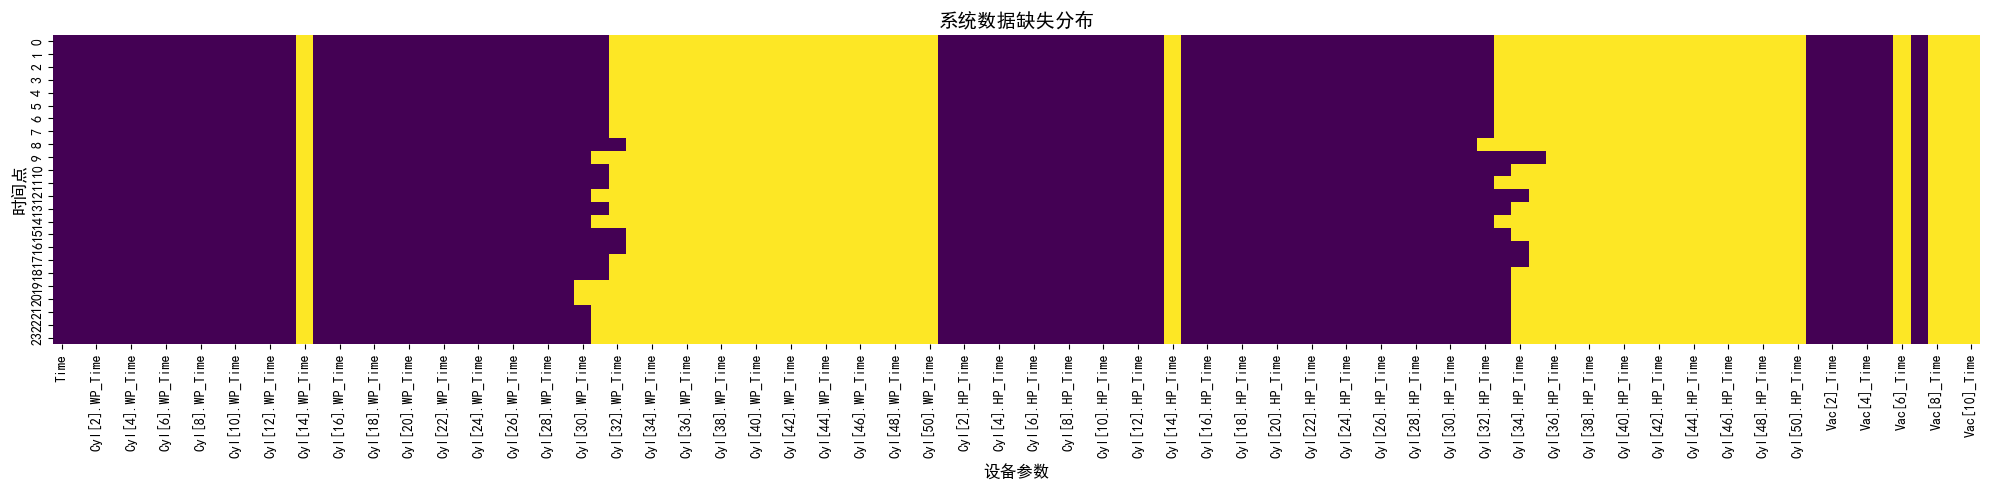

In [49]:
# 3. 缺失值热力图（全系统）
plt.figure(figsize=(20, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('系统数据缺失分布', fontsize=14)
plt.xlabel('设备参数', fontsize=12)
plt.ylabel('时间点', fontsize=12)
plt.tight_layout()
plt.savefig(f'../datas/imgs/cytime/缺失值热力图_{filename}.png')
plt.show()